# Method Comparison - Kang et. al dataset

# Figure 6 Reproducibility

In [1]:
import os
os.chdir("../")

In [2]:
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from scipy import sparse
from scipy import stats
from matplotlib import pyplot as plt
import reptrvae

Using TensorFlow backend.


In [3]:
sc.set_figure_params(dpi=200)

In [4]:
path_to_save = "./results/kang/"
sc.settings.figdir = path_to_save

In [5]:
specific_cell_type = "NK"

In [6]:
cell_type_key = "cell_type"
condition_key = "condition"
source_condition = "control"
target_condition = "stimulated"
conditions = ['control', 'stimulated']

In [7]:
adata = sc.read("./data/kang/kang_normalized.h5ad")
adata

AnnData object with n_obs × n_vars = 13576 × 2000 
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'stim', 'seurat_annotations', 'integrated_snn_res.0.5', 'seurat_clusters', 'condition', 'cell_type', 'n_counts'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'

In [9]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)

         Falling back to preprocessing with `sc.pp.pca` and default params.


... storing 'condition' as categorical
/home/mohsen/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


saving figure to file ../trVAE_reproducibility/results/kang/umap_Kang_original.pdf


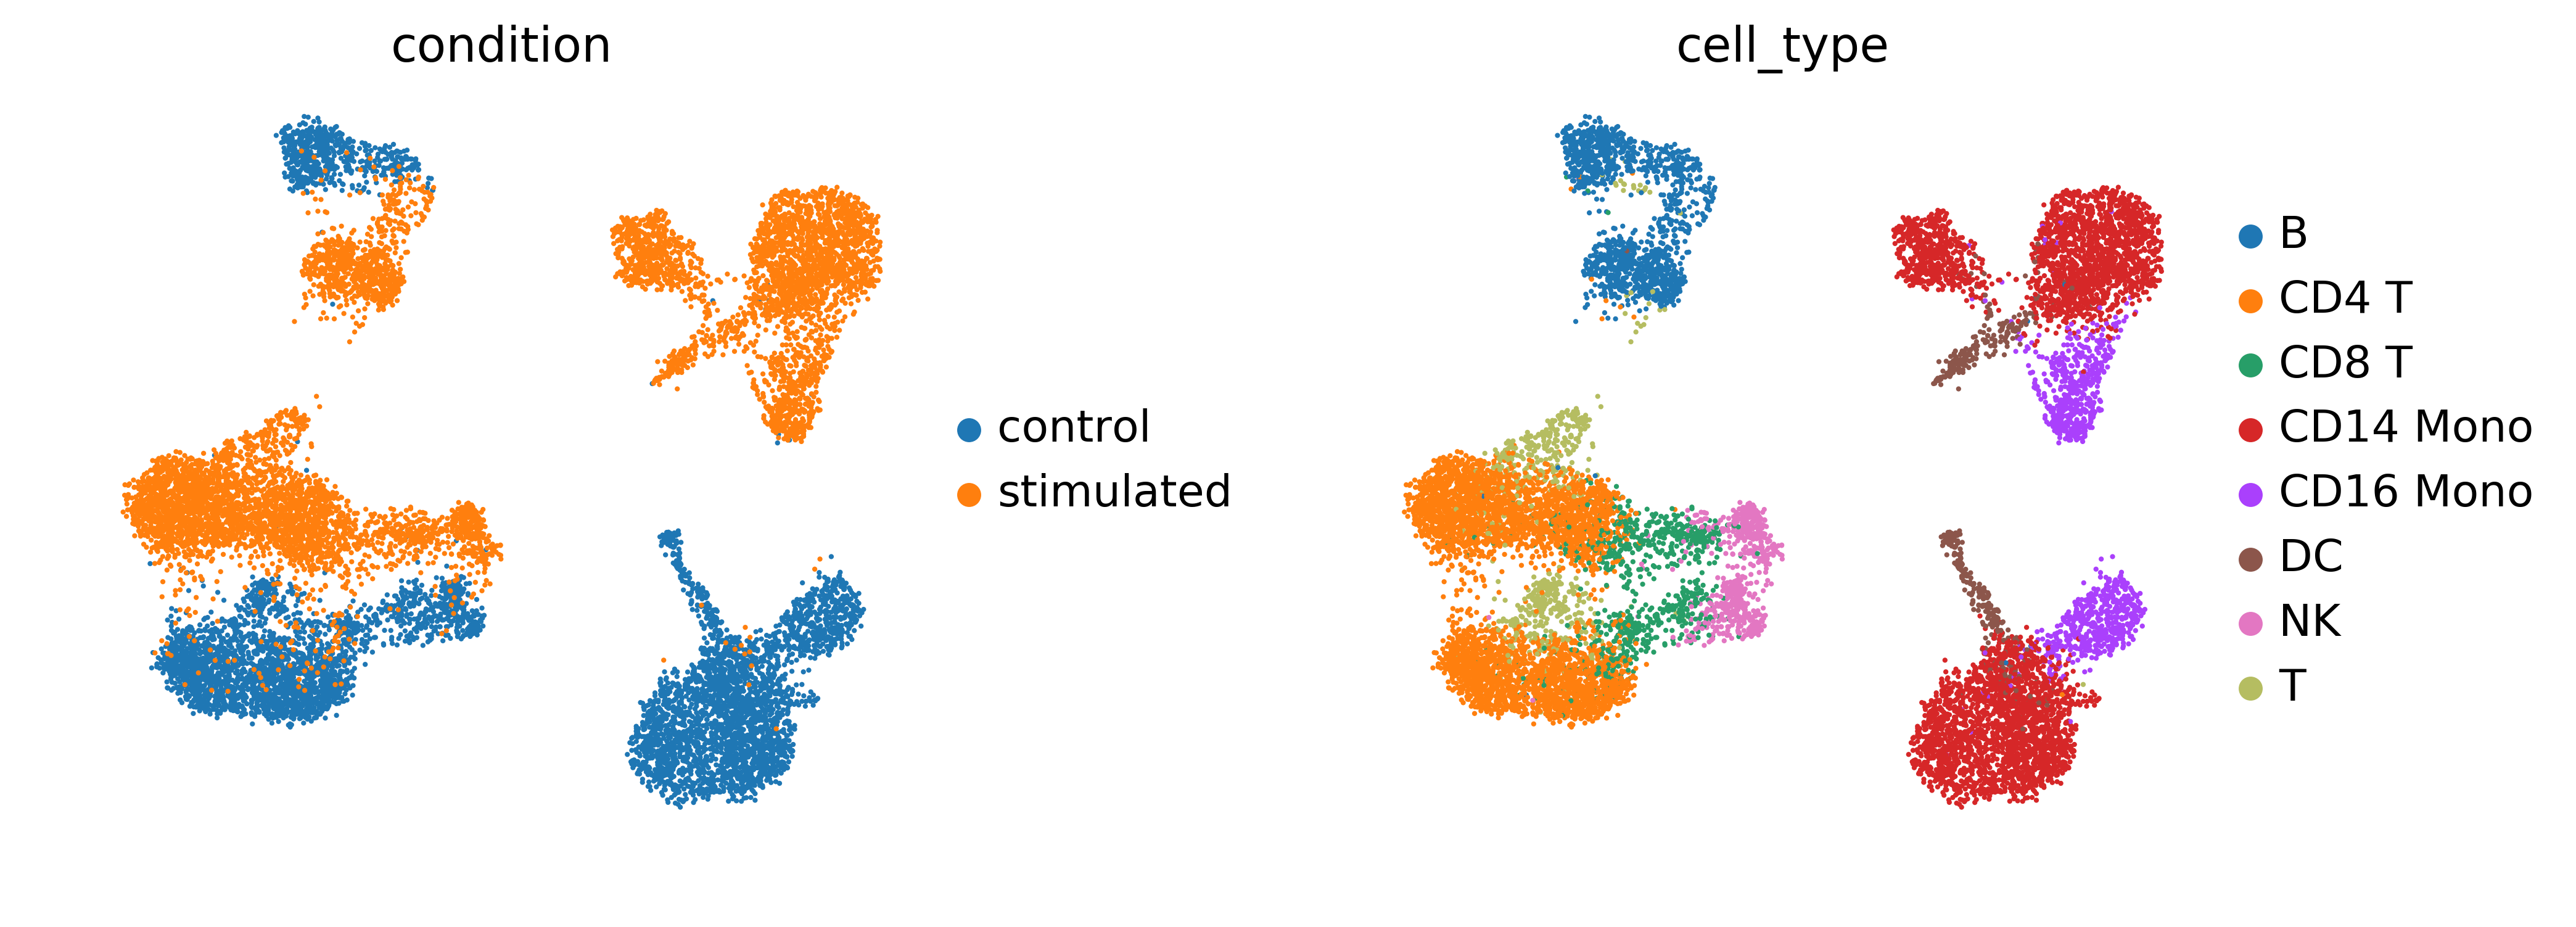

In [12]:
sc.pl.umap(adata, 
           color=[condition_key, cell_type_key], 
           wspace=0.4, 
           save='_Kang_original.pdf',
           frameon=False)

In [8]:
cell_type_adata = adata[adata.obs[cell_type_key] == specific_cell_type]
cell_type_adata

View of AnnData object with n_obs × n_vars = 619 × 2000 
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'stim', 'seurat_annotations', 'integrated_snn_res.0.5', 'seurat_clusters', 'condition', 'cell_type', 'n_counts'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'

In [9]:
ctrl_adata = cell_type_adata[cell_type_adata.obs[condition_key] == source_condition]
real_adata = cell_type_adata[cell_type_adata.obs[condition_key] == target_condition]

In [10]:
ctrl_adata.obs['method'] = source_condition
real_adata.obs['method'] = target_condition

Trying to set attribute `.obs` of view, making a copy.
Trying to set attribute `.obs` of view, making a copy.


In [11]:
trvae_reconstructed = sc.read("../trVAE_reproducibility/data/reconstructed/kang/trVAE_NK.h5ad")
trvae_reconstructed

AnnData object with n_obs × n_vars = 750 × 2000 
    obs: 'batch', 'cell_type', 'condition', 'integrated_snn_res.0.5', 'nCount_RNA', 'nFeature_RNA', 'n_counts', 'orig.ident', 'seurat_annotations', 'seurat_clusters', 'stim'

In [12]:
trvae_pred = trvae_reconstructed[trvae_reconstructed.obs[condition_key] == f"CTRL_to_STIM"]
trvae_pred.var = ctrl_adata.var
trvae_pred.obs['method'] = 'trVAE'

In [13]:
scvi_reconstructed = sc.read("../trVAE_reproducibility/data/reconstructed/kang/scVI-NK.h5ad")
scgen_reconstructed = sc.read("../trVAE_reproducibility/data/reconstructed/kang/scGen-NK.h5ad")
saucie_reconstructed = sc.read("../trVAE_reproducibility/data/reconstructed/kang/SAUCIE-NK.h5ad")
cgan_reconstructed = sc.read("../trVAE_reproducibility/data/reconstructed/kang/cgan-NK.h5ad")
cvae_reconstructed = sc.read("../trVAE_reproducibility/data/reconstructed/kang/CVAE-NK.h5ad")
mmdcvae_reconstructed = sc.read("../trVAE_reproducibility/data/reconstructed/kang/MMDCVAE-NK.h5ad")

In [14]:
scvi_pred = scvi_reconstructed[scvi_reconstructed.obs[condition_key] == f"{specific_cell_type}_pred_STIM"]
scvi_pred.var = ctrl_adata.var
scvi_pred.obs['method'] = 'scVI'

In [15]:
scgen_pred = scgen_reconstructed[scgen_reconstructed.obs[condition_key] == f"{specific_cell_type}_pred_STIM"]
scgen_pred.var = ctrl_adata.var
scgen_pred.obs['method'] = 'scGen'

In [16]:
saucie_pred = saucie_reconstructed[saucie_reconstructed.obs[condition_key] == f"{specific_cell_type}_pred_STIM"]
saucie_pred.var_names = ctrl_adata.var_names
saucie_pred.obs['method'] = 'SAUCIE'

Trying to set attribute `.obs` of view, making a copy.


In [17]:
cgan_pred = cgan_reconstructed[cgan_reconstructed.obs[condition_key] == f"pred_STIM"]
cgan_pred.var = ctrl_adata.var
cgan_pred.obs['method'] = 'Cycle GAN'

In [18]:
cvae_pred = cvae_reconstructed[cvae_reconstructed.obs[condition_key] == f"{specific_cell_type}_pred_{target_condition}"]
cvae_pred.var = ctrl_adata.var
cvae_pred.obs['method'] = 'CVAE'

In [19]:
mmdcvae_pred = mmdcvae_reconstructed[mmdcvae_reconstructed.obs[condition_key] == f"{specific_cell_type}_pred_STIM"]
mmdcvae_pred.var = ctrl_adata.var
mmdcvae_pred.obs['method'] = 'MMD-CVAE'

In [20]:
models = ctrl_adata.concatenate(real_adata, trvae_pred, scgen_pred, mmdcvae_pred, scvi_pred, cvae_pred, saucie_pred, cgan_pred)
models.obs['method'].unique()

array(['control', 'stimulated', 'trVAE', 'scGen', 'MMD-CVAE', 'scVI',
       'CVAE', 'SAUCIE', 'Cycle GAN'], dtype=object)

... storing 'cell_type' as categorical
... storing 'condition' as categorical
... storing 'method' as categorical
... storing 'orig.ident' as categorical
... storing 'seurat_annotations' as categorical
... storing 'stim' as categorical


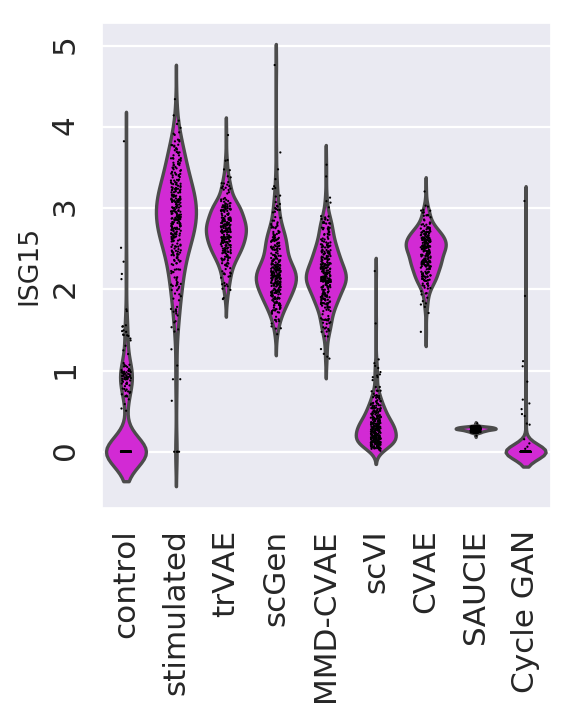

In [21]:
font = {'family' : 'Arial',
        'size'   : 30}

sc.set_figure_params(fontsize=25)
sns.set()
matplotlib.rc('ytick', labelsize=14)
matplotlib.rc('xtick', labelsize=14)
sc.pl.violin(models, 
             keys="ISG15", 
             groupby="method", 
             rotation=90,
             show=True,
             order=models.obs["method"].unique().tolist(),
             color = "#ee0ef0",
#              save="_model_cmpr.pdf",
             jitter=True,
            )
# os.rename(src=os.path.join(path_to_save, "violin_model_cmpr.pdf"), 
#           dst=os.path.join(path_to_save, "violin_model_comparison.pdf"))

In [22]:
def calc_R2_specific_model_mean(pred_adata, cell_type_adata, n_genes, conditions):
    real_adata = cell_type_adata[cell_type_adata.obs[condition_key] == target_condition]
    if n_genes != pred_adata.shape[1]:
        if not cell_type_adata.uns.keys().__contains__("rank_gene_groups"):
            sc.tl.rank_genes_groups(cell_type_adata, groupby="condition", n_genes=n_genes, method="wilcoxon")
        diff_genes = cell_type_adata.uns["rank_genes_groups"]["names"][conditions["real_stim"]]
        pred_adata = pred_adata[:, diff_genes.tolist()]
        real_adata = real_adata[:, diff_genes.tolist()]
    r2_means, r2_means_std = [], []
    r2_vars, r2_vars_std = [], []
    r_values_mean = np.zeros((1, 1000))
    r_values_var = np.zeros((1, 1000))
    for i in range(1000):
        pred_adata_idx = np.random.choice(range(0, pred_adata.shape[0]), int(1.0 * pred_adata.shape[0]))
        real_adata_idx = np.random.choice(range(0, real_adata.shape[0]), int(1.0 * real_adata.shape[0]))
        if sparse.issparse(pred_adata.X):
            pred_adata.X = pred_adata.X.A
            real_adata.X = real_adata.X.A
        x_mean = np.mean(pred_adata.X[pred_adata_idx], axis=0)
        y_mean = np.mean(real_adata.X[real_adata_idx], axis=0)
        
        x_var = np.var(pred_adata.X[pred_adata_idx], axis=0)
        y_var = np.var(real_adata.X[real_adata_idx], axis=0)
        
        m, b, r_value_mean, p_value, std_err_mean = stats.linregress(x_mean, y_mean)
        m, b, r_value_var, p_value, std_err_var = stats.linregress(x_var, y_var)
        
        r_values_mean[0, i] = r_value_mean ** 2
        r_values_var[0, i] = r_value_var ** 2

#     print(r_values_mean.mean(), r_values_mean.std(), r_values_var.mean(), r_values_var.std())
    return r_values_mean.mean(), r_values_mean.std(), r_values_var.mean(), r_values_var.std()

In [23]:
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2., 1.01 * height,
                '%.2f' % float(height),
                ha='center', va='bottom', fontsize=18)


In [27]:
def grouped_barplot(df, models, types, r2s, r2_stds, filename, put_label=False, legend=False, offset=0.375, step=2):
    plt.close("all")
    matplotlib.rc('ytick', labelsize=25)
    matplotlib.rc('xtick', labelsize=35)
    unique_models = df[models].unique()
    x_pos = np.arange(0, step * len(unique_models), step)
    unique_types = df[types].unique()
    plt.figure(figsize=(12, 10))
    for i, group in enumerate(unique_types):
        group_df = df[df[types] == group]
        b = plt.bar(x_pos + i / 1.25, group_df[r2s].values, capsize=10, alpha=0.95, label=f"{group}",
                    yerr=group_df[r2_stds].values)
        a = np.random.normal(group_df[r2s].values, group_df[r2_stds].values, (10, len(unique_models)))
        plt.plot(x_pos + i / 1.25, a.T, '.', color='black', alpha=0.5)
        if put_label:
            autolabel(b)

    plt.ylabel(r"$\mathrm{R^2}$", fontsize=30)
    plt.xticks(x_pos + offset, unique_models, rotation=90)
    if legend:
        plt.legend(bbox_to_anchor=(1.05, 0.5), loc="center left", borderaxespad=0, prop={'size': 18})
    plt.tight_layout()
    plt.savefig(os.path.join(path_to_save, filename), dpi=300)
    plt.show()


In [25]:
conditions = {"real_stim": f"{target_condition}", "pred_stim": f"{specific_cell_type}_pred_{target_condition}"}
trvae_r2_mean, trvae_r2_mean_std, trvae_r2_var, trvae_r2_var_std = calc_R2_specific_model_mean(trvae_pred, cell_type_adata, n_genes=1000, conditions=conditions)
mmdcvae_r2_mean, mmdcvae_r2_mean_std, mmdcvae_r2_var, mmdcvae_r2_var_std = calc_R2_specific_model_mean(mmdcvae_pred, cell_type_adata, n_genes=1000, conditions=conditions)
scvi_r2_mean, scvi_r2_mean_std, scvi_r2_var, scvi_r2_var_std = calc_R2_specific_model_mean(scvi_pred, cell_type_adata, n_genes=1000, conditions=conditions)
saucie_r2_mean, saucie_r2_mean_std, saucie_r2_var, saucie_r2_var_std = calc_R2_specific_model_mean(saucie_pred, cell_type_adata, n_genes=1000, conditions=conditions)
scgen_r2_mean, scgen_r2_mean_std, scgen_r2_var, scgen_r2_var_std = calc_R2_specific_model_mean(scgen_pred, cell_type_adata, n_genes=1000, conditions=conditions)
cvae_r2_mean, cvae_r2_mean_std, cvae_r2_var, cvae_r2_var_std = calc_R2_specific_model_mean(cvae_pred, cell_type_adata, n_genes=1000, conditions=conditions)
cgan_r2_mean, cgan_r2_mean_std, cgan_r2_var, cgan_r2_var_std = calc_R2_specific_model_mean(cgan_pred, cell_type_adata, n_genes=1000, conditions=conditions)

In [26]:
all_means = np.array([trvae_r2_mean, scgen_r2_mean, mmdcvae_r2_mean, scvi_r2_mean, cvae_r2_mean, saucie_r2_mean, cgan_r2_mean])
all_means_std = np.array([trvae_r2_mean_std, scgen_r2_mean_std, mmdcvae_r2_mean_std, scvi_r2_mean_std, cvae_r2_mean_std, saucie_r2_mean_std, cgan_r2_mean_std])
all_vars = np.array([trvae_r2_var, scgen_r2_var, mmdcvae_r2_var, scvi_r2_var, cvae_r2_var, saucie_r2_var, cgan_r2_var])
all_vars_std = np.array([trvae_r2_var_std, scgen_r2_var_std, mmdcvae_r2_var_std, scvi_r2_var_std, cvae_r2_var_std, saucie_r2_var_std, cgan_r2_var_std])
all_types = ["Mean"] * 7 + ["Variance"] * 7
models = ["trVAE", "scGen", "MMD-CVAE", "scVI", "CVAE", "SAUCIE", "Cycle GAN",] * 2
df = pd.DataFrame({"R^2": np.concatenate([all_means, all_vars]), "R^2 Stddevs": np.concatenate([all_means_std, all_vars_std]), "Type": all_types, "Models": models})
df

,R^2,R^2 Stddevs,Type,Models
0,0.974805,0.001327,Mean,trVAE
1,0.907193,0.003928,Mean,scGen
2,0.866242,0.003615,Mean,MMD-CVAE
3,0.764005,0.006121,Mean,scVI
4,0.704722,0.005471,Mean,CVAE
5,0.736003,0.005655,Mean,SAUCIE
6,0.053003,0.002022,Mean,Cycle GAN
7,0.685160,0.026582,Variance,trVAE
8,0.556678,0.021522,Variance,scGen
9,0.488912,0.031915,Variance,MMD-CVAE


/home/mohsen/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


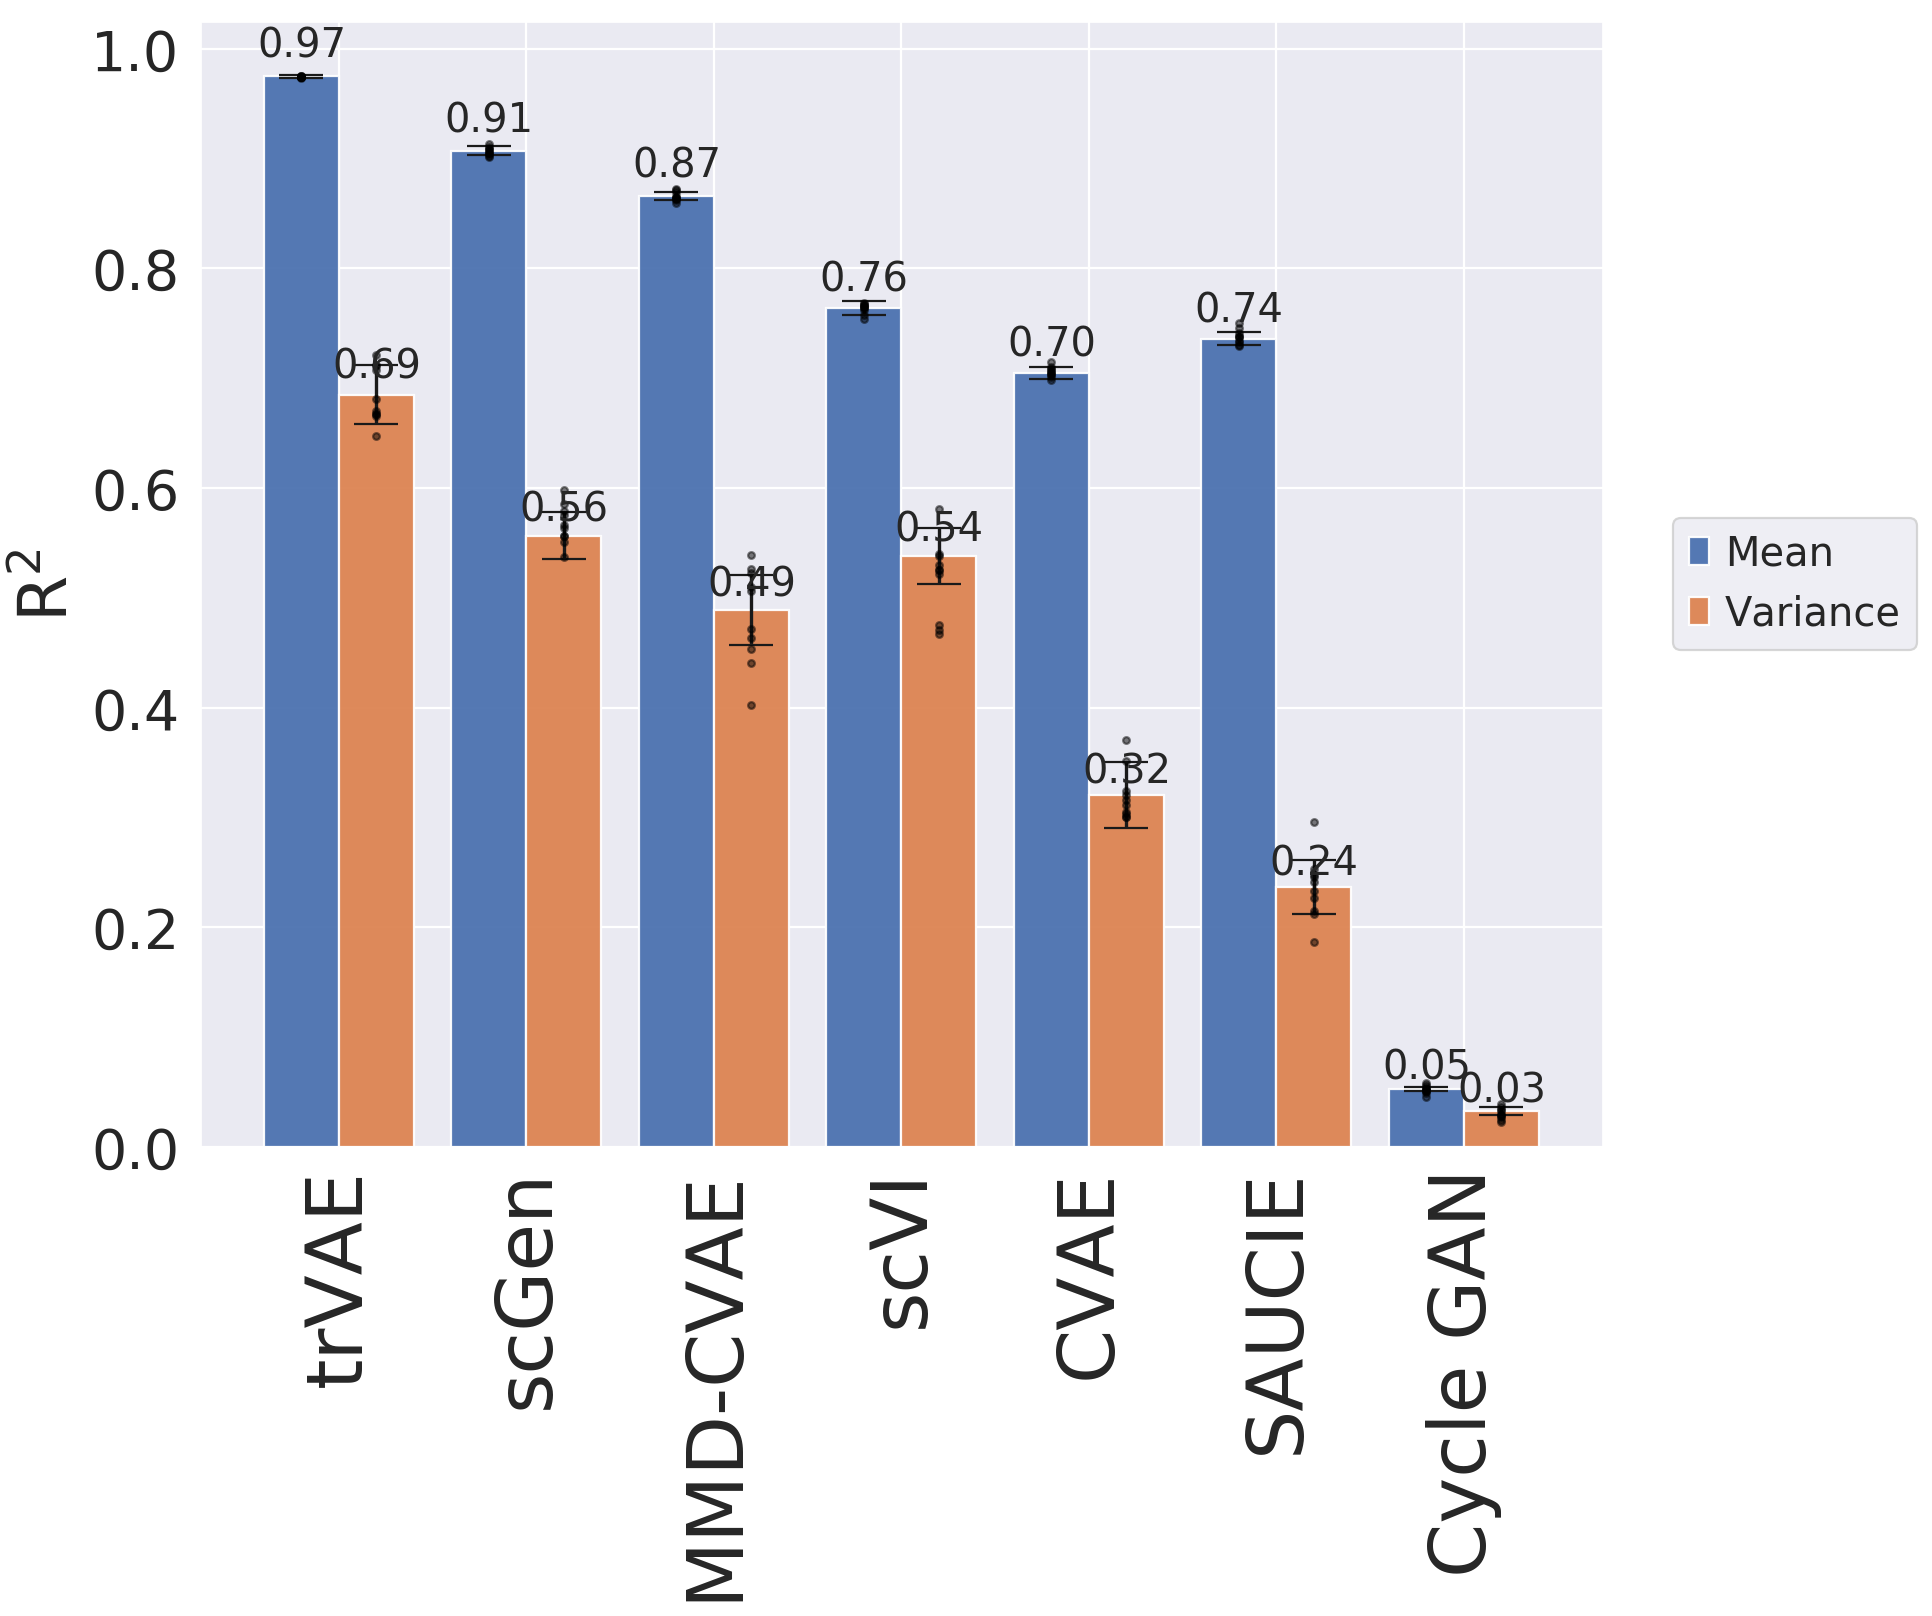

In [28]:
font = {'family' : 'Arial',
        'size'   : 2}

matplotlib.rc('font', **font)
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('xtick', labelsize=20)
grouped_barplot(df, 
                "Models", 
                "Type", 
                "R^2", 
                "R^2 Stddevs", 
                put_label=True, 
                legend=True, 
                filename="barplot_model_comparison.pdf", 
                offset=0.4)

# Reg Mean & Reg Var plot for Tuft

In [29]:
adata_pred = ctrl_adata.concatenate(real_adata, trvae_pred)
adata_pred

AnnData object with n_obs × n_vars = 864 × 2000 
    obs: 'batch', 'cell_type', 'condition', 'integrated_snn_res.0.5', 'method', 'nCount_RNA', 'nFeature_RNA', 'n_counts', 'orig.ident', 'seurat_annotations', 'seurat_clusters', 'stim'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'

In [30]:
adata_pred.obs[condition_key].unique()

array(['control', 'stimulated', 'CTRL_to_STIM'], dtype=object)

In [31]:
sc.tl.rank_genes_groups(cell_type_adata, reference=source_condition, 
                       groupby=condition_key, groups=[target_condition],
                       key_added='up_reg_genes', n_genes=50)
sc.tl.rank_genes_groups(cell_type_adata, reference=target_condition,
                         groupby=condition_key, groups=[source_condition],
                         key_added='down_reg_genes', n_genes=50)
up_genes = cell_type_adata.uns['up_reg_genes']['names'][target_condition]
down_genes = cell_type_adata.uns['down_reg_genes']['names'][source_condition]

/home/mohsen/miniconda3/envs/venv/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/mohsen/miniconda3/envs/venv/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/mohsen/miniconda3/envs/venv/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [32]:
top_genes = up_genes.tolist() + down_genes.tolist()

reg_mean_top100: 0.986824169173331
reg_mean_all: 0.9690800131767322


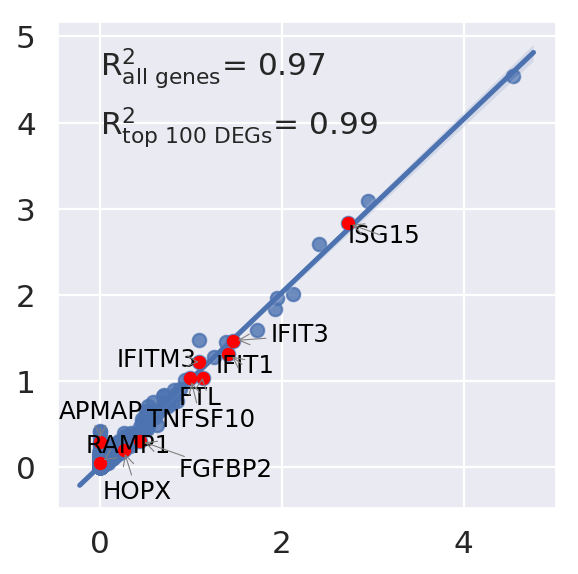

In [35]:
trvae.pl.reg_mean_plot(adata_pred,
                         top_100_genes=top_genes,
                         gene_list=top_genes[:5] + top_genes[50:55],
                         condition_key=condition_key,
                         axis_keys={'x': f"CTRL_to_STIM", 'y': f"{target_condition}"},
                         labels={'x': "", 'y': ""},
                         path_to_save=os.path.join(path_to_save, "trVAE_reg_mean.pdf"),
                         legend=False,
                         show=True,
                         x_coeff=1.0,
                         y_coeff=0.0)

reg_var_top100: 0.7297968768886761
reg_var_all: 0.702919972617199


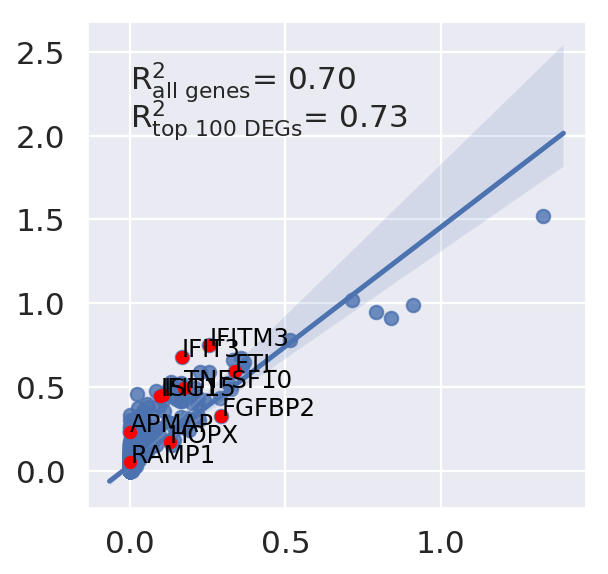

In [36]:
trvae.pl.reg_var_plot(adata_pred,
                         top_100_genes=top_genes,
                         gene_list=top_genes[:5] + top_genes[50:55],
                         condition_key=condition_key,
                         axis_keys={'x': f"CTRL_to_STIM", 'y': target_condition},
                         labels={'x': "", 'y': ""},
                         path_to_save=os.path.join(path_to_save, "trVAE_reg_var.pdf"),
                         legend=False,
                         show=True,
                         x_coeff=1.0,
                         y_coeff=-0.5)